# Attempt to store data as raw numpy arrays

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
csv_data = "C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA_SS/Cancer_de_Mama_IA_SS_2023/data/train.csv"

In [3]:
data = pd.read_csv(csv_data)
data.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [30]:
# Let´s read the first image
image_2 = cv2.imread("C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA_SS/Cancer_de_Mama_IA_SS_2023/data/raw_images/10006_1459541791.png", cv2.IMREAD_GRAYSCALE)

In [31]:
image_1 = cv2.imread("C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA_SS/Cancer_de_Mama_IA_SS_2023/data/raw_images/10006_462822612.png", cv2.IMREAD_GRAYSCALE)

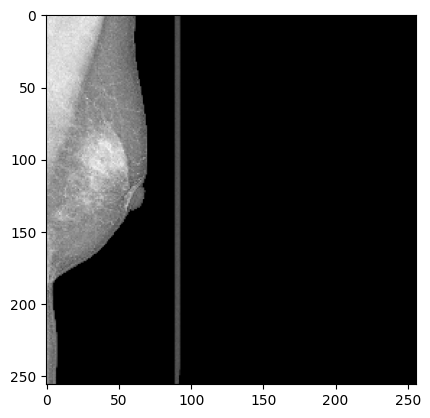

In [16]:
plt.imshow(image, cmap="gray")
plt.show()

In [32]:
image_1, image_2

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[199, 195, 218, ...,   0,   0,   0],
        [183, 221, 202, ...,   0,   0,   0],
        [196, 214, 194, ...,   0,   0,   0],
        ...,
        [129, 137, 101, ...,   0,   0,   0],
        [145, 128, 113, ...,   0,   0,   0],
        [140, 116, 101, ...,   0,   0,   0]], dtype=uint8))

In [33]:
# label
label_image_1 = data["cancer"][0]
label_image_1 = np.array(label_image_1)
label_image_1

array(0, dtype=int64)

In [34]:
label_image_2 = data["cancer"][1]
label_image_2 = np.array(label_image_2)
label_image_2

array(0, dtype=int64)

In [19]:
# both as numpy arrays

print(type(image), type(label_image))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [36]:
with open('test.npy', 'wb') as f:
    np.save(f, (image_1, image_2))
    np.save(f, (label_image_1, label_image_2))

In [39]:
with open('test.npy', 'rb') as f:
    X = np.load(f)
    y = np.load(f)
print(X, y)

[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[199 195 218 ...   0   0   0]
  [183 221 202 ...   0   0   0]
  [196 214 194 ...   0   0   0]
  ...
  [129 137 101 ...   0   0   0]
  [145 128 113 ...   0   0   0]
  [140 116 101 ...   0   0   0]]] [0 0]


### Now let´s try to process all train images

In [2]:
train_filepath = "C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA_SS/Cancer_de_Mama_IA_SS_2023/models/new_train.csv"

train_data = pd.read_csv(train_filepath, names=["Filepath", "Label"]) 
train_data.head()

,Filepath,Label
0,C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA...,0
1,C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA...,1
2,C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA...,1
3,C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA...,1
4,C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA...,1


In [3]:
train_data.shape

(1852, 2)

In [25]:
images = []
labels = []
for i in range(len(train_data)):
    image = cv2.imread(train_data["Filepath"][i], 0)
    label = train_data["Label"][i]  
    
    images.append(image)
    labels.append(label)

In [26]:
with open('Raw_images.npy', 'wb') as f:
    np.save(f, images)
    np.save(f, labels)

In [31]:
with open('Raw_images.npy', 'rb') as f:
    X = np.load(f, allow_pickle=True)
    y = np.load(f, allow_pickle=True)
print(X.shape, y.shape)

(1852, 256, 256) (1852,)


In [33]:
y

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

#### Additional script in this directory to test conv net training